# Reto 01

Ahora, tú deberás generar una clusterización con base en los datos proporcionados para el reto actual. Las variables siguen la misma lógica que el ejemplo respectivo: Estamos en una agencia de comercio internacional, y contamos con las variables: salarios emparentados con ventas por volúmen y la edad de los vendedores.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

# Paso 01. Cargue y manipule los datos

In [7]:
#df = pd.read_csv("datum.csv")
df = pd.read_csv("https://raw.githubusercontent.com/jaffotsa/sml/main/Sesi%C3%B3n%2003.%20Clusterizaci%C3%B3n/Reto%2001/datum.csv", index_col=0)
x_var = "Edad"; y_var = "Total Ventas"; z_var = "Salario"
data = df.loc[:, [x_var, y_var, z_var]]
df.head(5)

,Sexo,Edad,Total Ventas,Salario
No,,,,
1,H,60,69900,6325
2,H,30,79000,5200
3,M,52,85500,7825
4,M,57,17100,8375
5,M,55,5500,5450


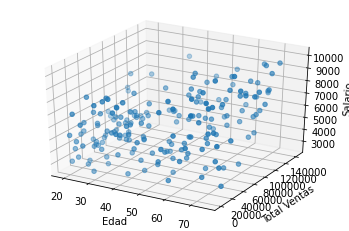

In [24]:
x = data[x_var]
y = data[y_var]
z = data[z_var]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.set_zlabel(z_var)

ax.scatter(x, y, z);

# Paso 02. Use y grafique uno de los métodos desarrollados por él Experto para decidir la cantidad de Clusters a emplear

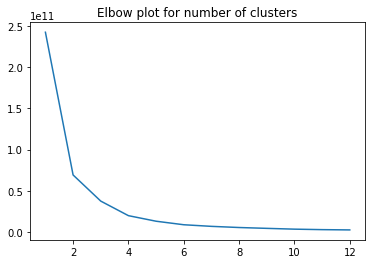

In [14]:
max_K = 12

inertias = []
for k in range(max_K):
  kmeans = KMeans(n_clusters=k+1, init='k-means++', random_state=123)
  kmeans.fit(data)
  inertias.append(kmeans.inertia_)

plt.plot(range(1, max_K+1), inertias);
plt.title("Elbow plot for number of clusters");

# Paso 03. Visualice los clusters agrupados en un scatter plot de Pyplot

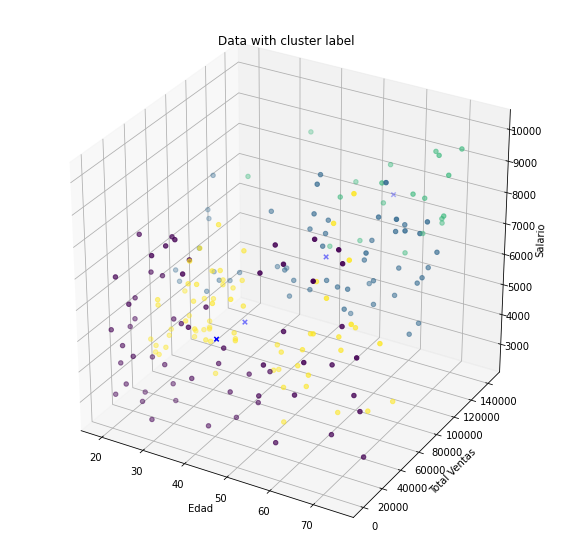

In [23]:
k_select = 4
kmeans = KMeans(n_clusters=k_select, random_state=123)
labels = kmeans.fit_predict(data)
data["Label"] = labels


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, c=labels)
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], marker="x", c="blue")

ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.set_zlabel(z_var)

plt.title("Data with cluster label");